In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os

print (os.listdir ('./gold'))

['gld_price_data.csv']


In [3]:
df = pd.read_csv("./gold/gld_price_data.csv")

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
Date       2290 non-null object
SPX        2290 non-null float64
GLD        2290 non-null float64
USO        2290 non-null float64
SLV        2290 non-null float64
EUR/USD    2290 non-null float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Text(0.5, 1.05, 'Correlation of df Features')

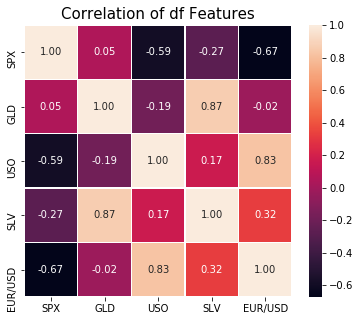

In [7]:
import seaborn as sns
corr = df.corr()



Text(0.5, 1.05, 'Correlation of df Features')

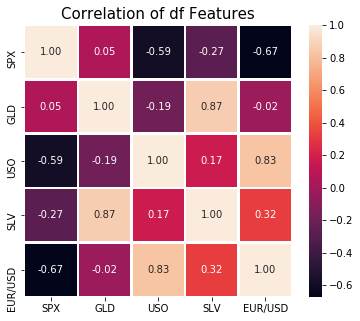

In [13]:
plt.figure(figsize = (6,5))

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=1.50)

plt.title('Correlation of df Features', y = 1.05, size=15)

In [14]:
print (corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



In [17]:
X = df.drop(['GLD'],axis=1)
Y = df['GLD']

In [23]:
X=X.drop('Date',axis=1)
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [22]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)



In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1832 entries, 2280 to 1061
Data columns (total 4 columns):
SPX        1832 non-null float64
USO        1832 non-null float64
SLV        1832 non-null float64
EUR/USD    1832 non-null float64
dtypes: float64(4)
memory usage: 71.6 KB


In [30]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 1971 to 1814
Data columns (total 4 columns):
SPX        458 non-null float64
USO        458 non-null float64
SLV        458 non-null float64
EUR/USD    458 non-null float64
dtypes: float64(4)
memory usage: 17.9 KB


In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [38]:
y_pred = regressor.predict(X_test)

In [39]:
y_pred

array([114.0577001 , 147.48350164, 140.03279764, 112.64160181,
       113.79039985,  95.70489933, 111.70289955,  93.25969962,
       120.94980057, 127.07539968, 147.9640995 , 120.50219902,
       119.30730067,  88.05940052,  96.11309972,  92.77629823,
       117.00680085,  88.997799  , 125.268001  , 114.73360022,
       118.92279932, 152.61070254, 122.5308978 , 119.77279988,
       171.07489971, 108.2836988 , 120.60890054,  87.12949872,
        88.272701  ,  88.33249908, 121.5450003 , 154.64150181,
       150.23559903, 125.93330001, 126.56190018,  91.18799826,
       159.90060018, 121.31340197, 106.57830058, 144.37809698,
        92.45389918, 127.7112007 , 117.42950068, 152.91240146,
       119.4728997 ,  91.33400145,  80.12370002, 120.17110185,
       132.52410035, 119.0665995 , 127.27100092, 165.91169964,
       152.97970069,  92.61239974, 149.31099983, 151.89649996,
       112.98630041, 112.89200028,  87.18809917, 127.71179923,
       125.31250092, 151.72500302, 114.77190015, 110.62

In [36]:
y_train

2280    124.589996
1730    103.849998
418     110.820000
979     157.119995
223      88.529999
           ...    
960     154.470001
905     167.509995
1096    163.169998
235      90.209999
1061    167.990005
Name: GLD, Length: 1832, dtype: float64

In [40]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   1.2737687034716174
MSE :   6.975310905831537
RMAE :   2.6410813894750644


In [42]:
accuracy_train = regressor.score(X_train, y_train)
accuracy_test = regressor.score(X_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9986626533167614
0.9867829349849842


In [46]:
type(y_pred)

numpy.ndarray

In [52]:
regressor.score(X_test, y_pred)

1.0

In [53]:
pd.Series(y_pred)

0      114.057700
1      147.483502
2      140.032798
3      112.641602
4      113.790400
          ...    
453    115.491400
454    101.094498
455    129.550799
456    164.780598
457    119.129203
Length: 458, dtype: float64

In [55]:
y_test

1971    110.820000
1163    151.050003
693     137.660004
1651    113.070000
508     114.629997
           ...    
1524    115.779999
363      98.900002
1272    130.559998
1053    164.860001
1814    120.589996
Name: GLD, Length: 458, dtype: float64